In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly.express as px
import cufflinks as cf #very powerful and buetiful charts
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)
cf.go_offline()

# Problem


A retail company “FastTrack Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [93]:
df_train = pd.read_csv("C:\\Users\\Ravi Nadageri\\Documents\\blackfriday\\blackfriday_train.csv")
#Lets import the rawfile with help of pandas
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [94]:
#Import test data

df_test = pd.read_csv("C:\\Users\\Ravi Nadageri\\Documents\\blackfriday\\blackfriday_test.csv")

df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [95]:
print(df_train.shape)
print('>'* 19,'<'*19)
print(df_test.shape)


(550068, 12)
>>>>>>>>>>>>>>>>>>> <<<<<<<<<<<<<<<<<<<
(233599, 11)


In the test data the price column has missing which we will predict later by using train data set, once we built the ML Model

In [96]:
# we can merge the both data set but we can use train data set first

# m1 = pd.merge(df_train,df_test,how='outer') # we can add the DataFrame using Merge function
# m2 = pd.concat([df_train,df_test], ignore_index=True) # we have another method to concat the data frames
# m3 = df_train.append(df_test)

# print(m1.shape)
# print(m2.shape)
# print(m3.shape)

df = df_train

In [97]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [98]:
#basic infor of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [99]:
#look like the user_id column is not making sense , so we can drop it 

print(df.User_ID.nunique())

df.drop('User_ID',axis=1,inplace=True)

5891


In [100]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [101]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Lets fill the NA using mode value of that column

In [102]:
df['Product_Category_2']

0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_2, Length: 550068, dtype: float64

In [103]:
df['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [104]:
df['Product_Category_2'].mode()[0]

8.0

In [105]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [106]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [107]:
df.isna().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Now we are good to go for data visualization and further assumptions 

<AxesSubplot:xlabel='Gender', ylabel='count'>

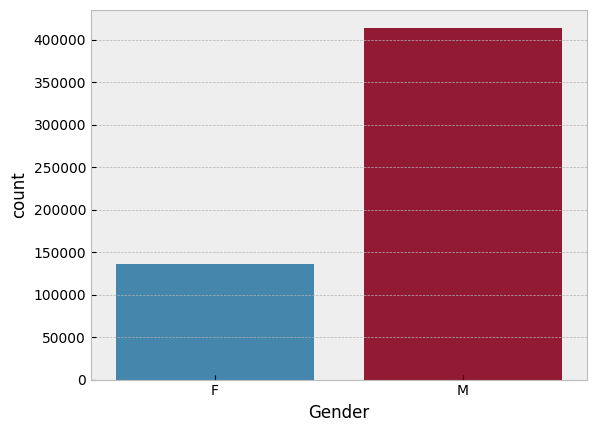

In [108]:
sns.countplot(x='Gender',data=df)

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Purchase', ylabel='Density'>

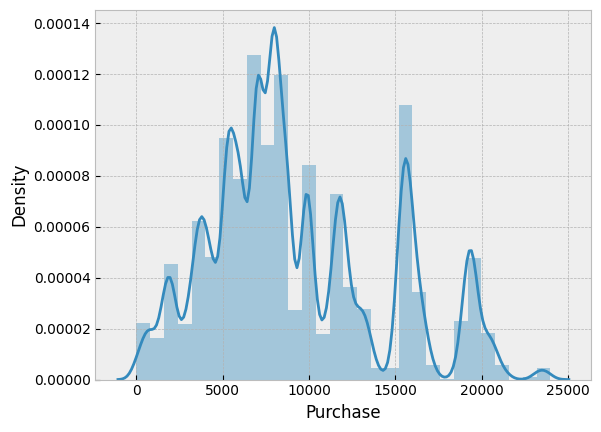

In [109]:
sns.distplot(df['Purchase'],bins=30)

Text(0.5, 1.0, 'Age vs Purchase contribution')

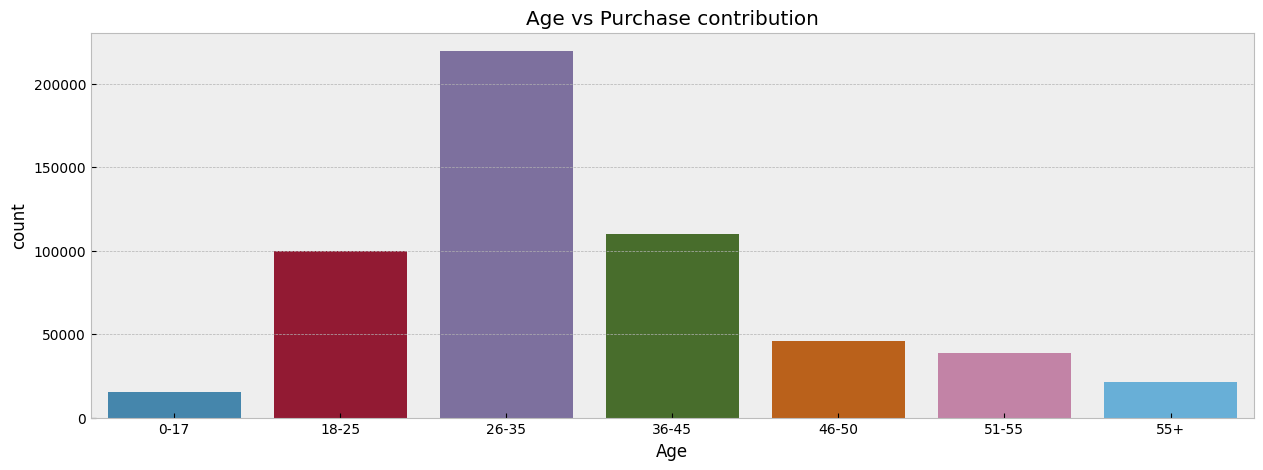

In [110]:
plt.figure(figsize=(15,5))
sns.countplot(x='Age',data=df,order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+',])
plt.title('Age vs Purchase contribution')

The Age group 26-35 has the highest Purchesers , may be because of this age of most people is a Yougster and leaving Bachller life or may be a new married life so they can Purchase quickly where on Childrens and Older people has the lowest contribution on Purchase

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



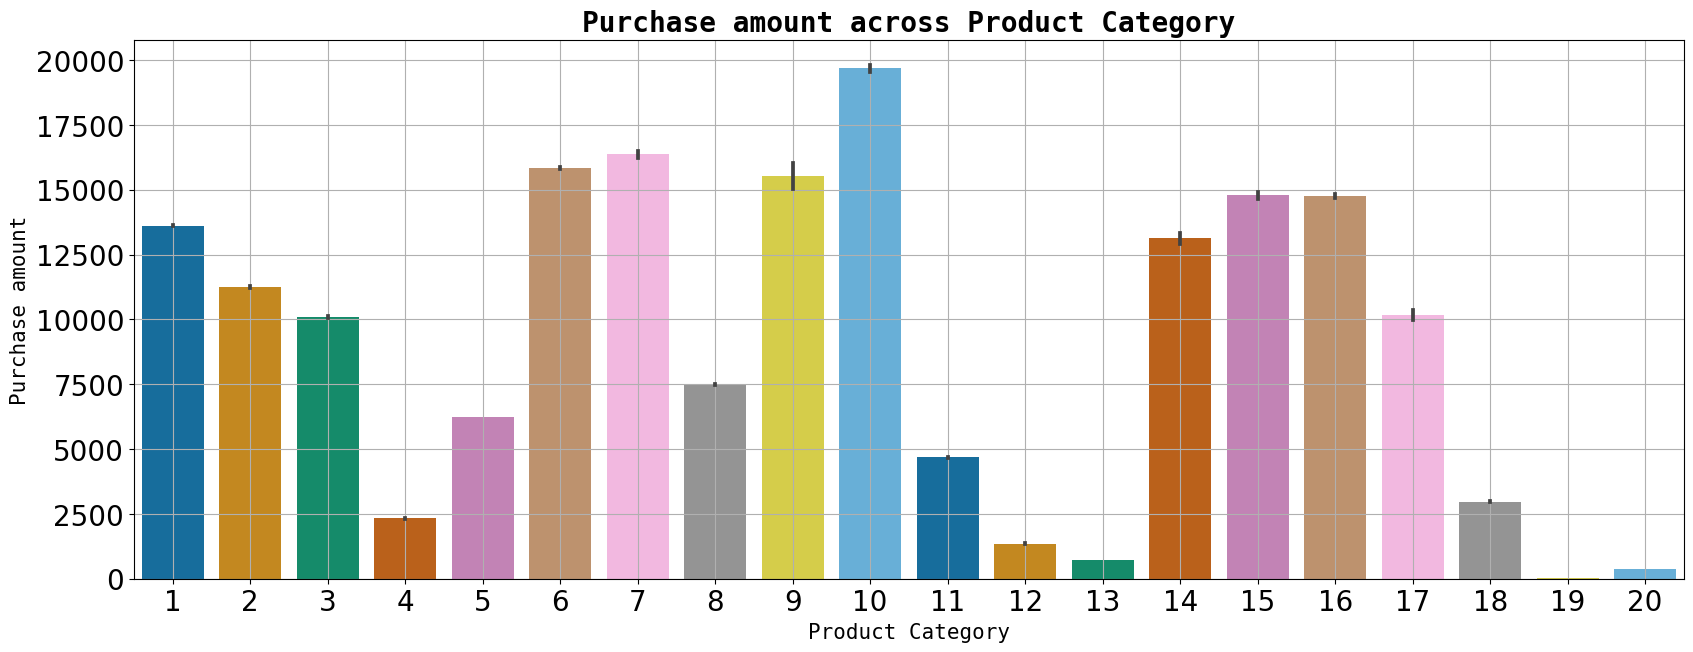

In [20]:
# Creating a barplot of 'Product_Category_1 vs Purchase'
plt.style.use('default')
plt.figure(figsize = (20, 7))
sns.barplot(df['Product_Category_1'], df['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

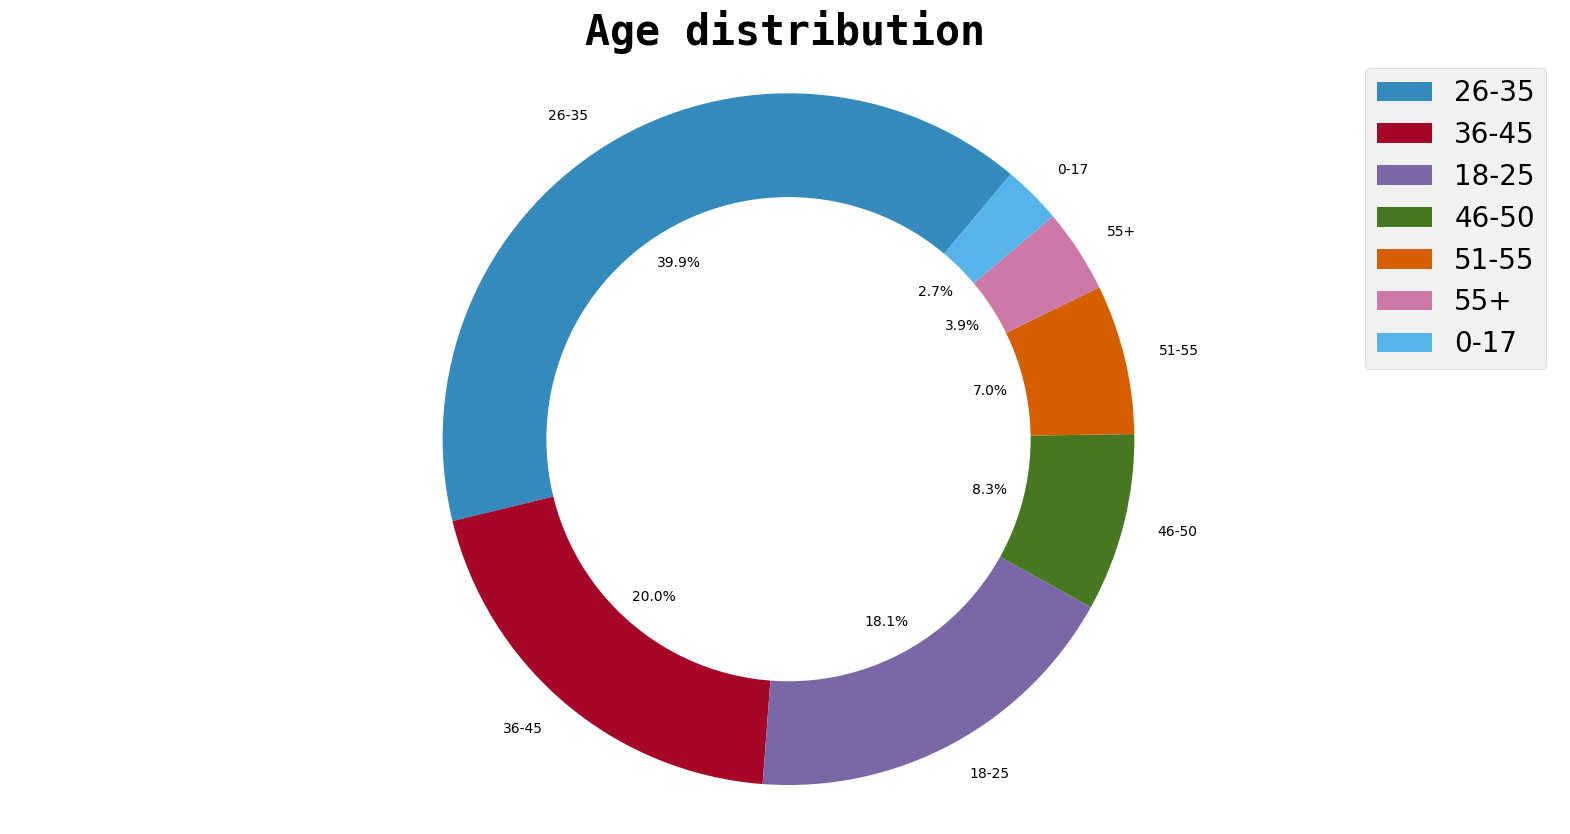

In [21]:
# Creating a donut chart for 'Age'
age = df['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

In [22]:
df.groupby('City_Category').sum()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
City_Category,,,,,,
A,1156406,56547,813387,1372860.0,2225640.0,1316471661
B,1846444,94452,1242828,2137319.0,3468392.0,2115533605
C,1439888,74338,916501,1583873.0,2551249.0,1663807476


([<matplotlib.patches.Wedge at 0x17c5cc5e230>,
 [Text(-0.7750303815069413, 0.19831265149053187, 'B'),
  Text(0.27526890852688407, -0.5331294664510844, 'C'),
  Text(0.4482528206582669, 0.3988350646218405, 'A')],
 [Text(-1.404742566481331, 0.35944168082658895, '42.03'),
  Text(0.5734768927643418, -1.110686388439759, '31.12'),
  Text(0.933860043038056, 0.8309063846288344, '26.85')])

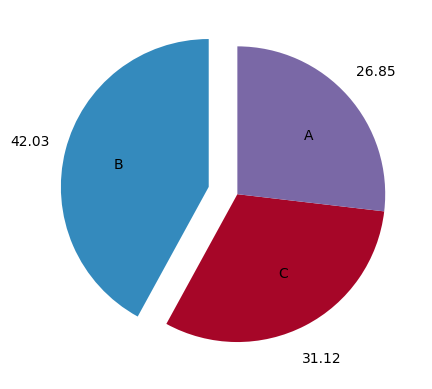

In [23]:
name = df['City_Category'].value_counts().index

numbers = df['City_Category'].value_counts()
myexplode = [0.2, 0, 0]
plt.pie(x=numbers,labels=name,data=df,startangle=90,autopct='%2.2f',explode = myexplode,pctdistance=1.25, labeldistance=.6)

City Category "B" has the largest contribution in amoungst 3 city

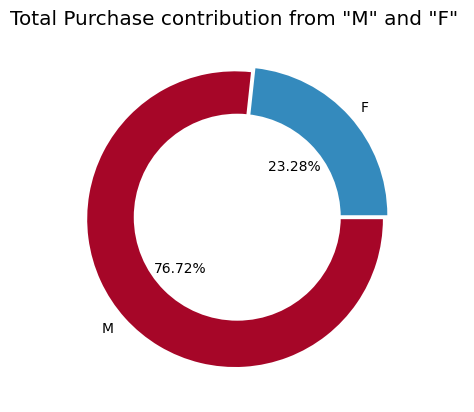

In [24]:
name = df.groupby('Gender').sum().index
num = df.groupby('Gender').sum()['Purchase']

explode = (0.02,0.02)
plt.pie(x=num,labels=name,data=df,pctdistance=0.5,explode=explode,autopct='%1.2f%%')

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Total Purchase contribution from "M" and "F" ')
 
# Displaying Chart
plt.show()

Male has the contribution of Highest purchase

Text(0.5, 1.0, 'Product category vs the Purchase distribution')

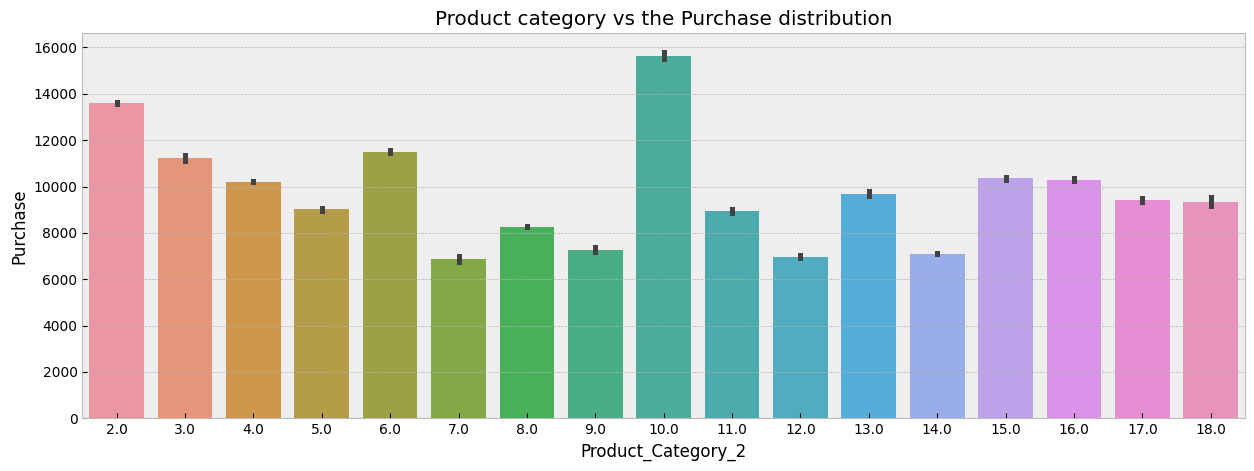

In [111]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Product_Category_2'],y=df['Purchase'],data=df)
plt.title('Product category vs the Purchase distribution')

# Lest start the preparation for model

In [26]:
df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
5,P00193542,M,26-35,15,A,3,0,1,2.0,16.0,15227
6,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,P00346142,M,46-50,7,B,2,1,1,15.0,16.0,15854
8,P0097242,M,46-50,7,B,2,1,1,16.0,16.0,15686
9,P00274942,M,26-35,20,A,1,1,8,8.0,16.0,7871


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

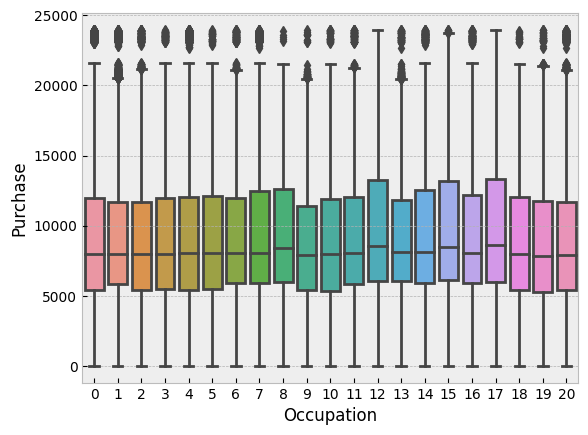

In [27]:
sns.boxplot(x='Occupation',y='Purchase',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

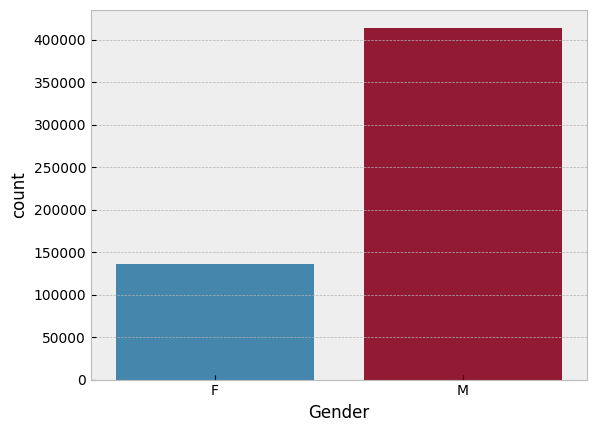

In [28]:
sns.countplot(x='Gender',data=df)

In [29]:
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [30]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,1,55+,16,C,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,51-55,13,B,1,1,20,8.0,16.0,368
550064,P00375436,0,26-35,1,C,3,0,20,8.0,16.0,371
550065,P00375436,0,26-35,15,B,4+,1,20,8.0,16.0,137
550066,P00375436,0,55+,1,C,2,0,20,8.0,16.0,365


In [31]:
#wwe gave to handle the categorical fields to move ahead

df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [32]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

The same above thing we can do in a more professional way as shown below

In [33]:

# from sklearn import preprocessing

# label_encoder= preprocessing.LabelEncoder()

# df['Age'] = label_encoder.fit_transform(df['Age']) 

df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422


In [34]:
#df['City_Category'] = label_encoder.fit_transform(df['City_Category'])

df.City_Category.value_counts()


B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [35]:
df['City_Category'] = df['City_Category'].replace({'A':1,'B':2,'C':3})
# df['City_Category'].apply(lambda x :2 if x =='B' else 3) 
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057
4,P00285442,1,7,16,3,4+,0,8,8.0,16.0,7969


The below one is the other way to do the above work 

In [36]:

# df_city = pd.get_dummies(df['City_Category'],drop_first=True)
# df_city.head()

In [37]:
df.isna().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [38]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057
4,P00285442,1,7,16,3,4+,0,8,8.0,16.0,7969


In [39]:
## Focus on replacing missing values for Product_category 2

df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

Intead to drop the column we can fill NaN with its mode value

In [40]:
df['Product_Category_2'].value_counts()

8.0     237726
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [41]:
df['Product_Category_2'].mode()[0]

8.0

In [42]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [43]:
df['Product_Category_2'].value_counts()

8.0     237726
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

The same process we have repet for "Product_Category_3" column to fill NaN

In [44]:
df['Product_Category_3'].mode()[0]

16.0

In [45]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

Lets confirm the NaN values again

In [46]:
df.isna().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [47]:
df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422


In the column of "Stay_In_Current_City_Years"  we need to correct some numbers , by replacing + sign in to empty space

In [48]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [49]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


C:\Users\Ravi Nadageri\AppData\Local\Temp\ipykernel_10316\323606303.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 46.2+ MB


If see above info status we have to update the data type for many columns 

In [51]:
#df['Stay_In_Current_City_Years'] is all numbers so we can convert this in to Integer
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_1'] = df['Product_Category_1'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Product_ID                  550068 non-null  object
 1   Gender                      550068 non-null  int64 
 2   Age                         550068 non-null  int64 
 3   Occupation                  550068 non-null  int64 
 4   City_Category               550068 non-null  int64 
 5   Stay_In_Current_City_Years  550068 non-null  int32 
 6   Marital_Status              550068 non-null  int64 
 7   Product_Category_1          550068 non-null  int32 
 8   Product_Category_2          550068 non-null  int32 
 9   Product_Category_3          550068 non-null  int32 
 10  Purchase                    550068 non-null  int64 
dtypes: int32(4), int64(6), object(1)
memory usage: 37.8+ MB


In [52]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8,16,8370
1,P00248942,0,1,10,1,2,0,1,6,14,15200


In [53]:
df.drop('Product_ID',inplace=True,axis=1)

In [54]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [55]:
X = df[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]

y = df['Purchase']

In [56]:
X.shape

(550068, 9)

In [57]:
y.shape

(550068,)

In [58]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,1,2,0,3,8,16
1,0,1,10,1,2,0,1,6,14
2,0,1,10,1,2,0,12,8,16
3,0,1,10,1,2,0,12,14,16
4,1,7,16,3,4,0,8,8,16


In [59]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [64]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [66]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [67]:
y_pred = knn.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [69]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", r2_score(y_test, y_pred))

RMSE: 3473.517892781793
R2 score: 0.5198105490797605


In [70]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

In [71]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [76]:
y_pred_dec = dec_tree.predict(X_test)

In [77]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_dec)))
print("R2 score:", r2_score(y_test, y_pred_dec))

RMSE: 3308.5061565705473
R2 score: 0.5643502907302306


Lets save the model for future use

In [78]:
import pickle

In [79]:
pickle.dump(knn, open("C:\\Users\\Ravi Nadageri\\Documents\\Github_projects\\blackfriday\\Bfsknn.pkl",'wb'))

In [80]:
pickle.load(open("C:\\Users\\Ravi Nadageri\\Documents\\Github_projects\\blackfriday\\Bfsknn.pkl",'rb'))

KNeighborsRegressor()

In [81]:
pickle.dump(dec_tree, open("C:\\Users\\Ravi Nadageri\\Documents\\Github_projects\\blackfriday\\Bfsknn.pkl",'wb'))

In [82]:
pickle.load(open("C:\\Users\\Ravi Nadageri\\Documents\\Github_projects\\blackfriday\\Bfsknn.pkl",'rb'))

DecisionTreeRegressor()